# Classification Analysis Lecture

In this lecture, we'll explore classification techniques using Python. We cover both multi-class (using the Iris dataset) and binary classification (using the Breast Cancer dataset). We'll use various classifiers, evaluate their performance with metrics, visualize confusion matrices and decision regions, and perform hyperparameter optimization and cross-validation.

**Topics Covered:**
- Data loading and inspection
- Dummy classifier for baseline comparison
- Multi-class classification (Iris dataset) using K-Nearest Neighbors (KNN)
- Binary classification (Breast Cancer dataset) using Logistic Regression and Gaussian Naive Bayes
- Visualization of decision boundaries and confusion matrices
- Hyperparameter optimization and cross-validation


**Regression**: Represent the distribution as line. (Continuos)

**Classification**: Separate the data into classes.

In [1]:
# Import Libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# For plotting decision regions (using mlxtend)
!pip install mlxtend --quiet
from mlxtend.plotting import plot_decision_regions

# Set plotting styles
sns.set(style="whitegrid")
%matplotlib inline


## Multi-Class Classification with the Iris Dataset

We begin with the Iris dataset (a classic multi-class classification problem). We'll load the data, split it, and evaluate a baseline model (DummyClassifier) followed by K-Nearest Neighbors (KNN). We'll visualize the decision regions.


In [2]:
# Load and Inspect the Iris Dataset
iris = datasets.load_iris()
X_iris = iris.data  # All 4 features
y_iris = iris.target
target_names = iris.target_names

# Create a DataFrame for inspection
df_iris = pd.DataFrame(data=np.c_[X_iris, y_iris],
                       columns=iris.feature_names + ['target'])
print("Iris Dataset Head:")
display(df_iris.head())


Iris Dataset Head:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Baseline with Dummy Classifier
We start with a baseline classifier that makes predictions by random chance using the stratified strategy.


Dummy Classifier Report:
              precision    recall  f1-score   support

           0       0.23      0.25      0.24        12
           1       0.11      0.08      0.09        13
           2       0.31      0.38      0.34        13

    accuracy                           0.24        38
   macro avg       0.22      0.24      0.23        38
weighted avg       0.22      0.24      0.22        38

Balanced Accuracy: 0.2371794871794872
Weighted F1 Score: 0.22485728427652205
Log Loss: 27.506998639063088


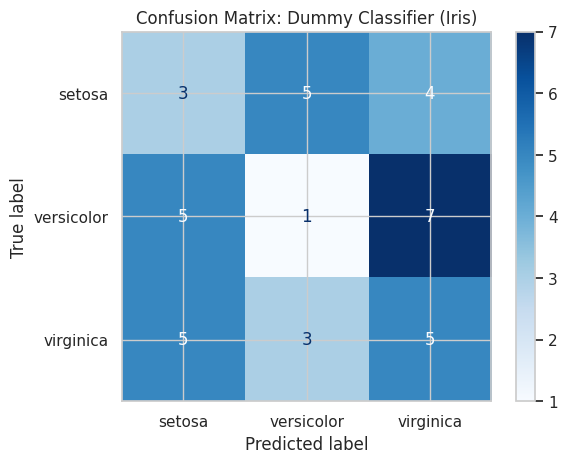

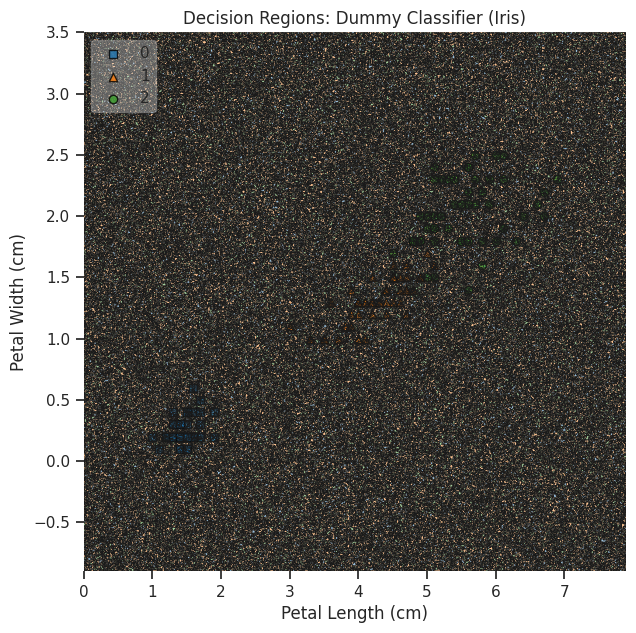

In [3]:
# Baseline Dummy Classifier on Iris
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=42, stratify=y_iris)

# Train DummyClassifier
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)

# Predictions and Evaluation
y_dummy_pred = dummy.predict(X_test)
y_dummy_prob = dummy.predict_proba(X_test)

print("Dummy Classifier Report:")
print(classification_report(y_test, y_dummy_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_dummy_pred))
print("Weighted F1 Score:", f1_score(y_test, y_dummy_pred, average='weighted'))
print("Log Loss:", log_loss(y_test, y_dummy_prob))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_dummy_pred), display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Dummy Classifier (Iris)")
plt.show()

# Visualize decision regions using only two features (petal length and petal width)
X_iris_reduced = iris.data[:, 2:]  # Use petal length and petal width
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_iris_reduced, y_iris, test_size=0.3, random_state=1, stratify=y_iris)

# Fit dummy on reduced data (just for visualization; decision regions not meaningful for dummy classifier)
dummy.fit(X_train_red, y_train_red)
plt.figure(figsize=(7,7))
plot_decision_regions(np.vstack((X_train_red, X_test_red)), np.hstack((y_train_red, y_test_red)), clf=dummy, legend=2)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Regions: Dummy Classifier (Iris)")
plt.show()


### K-Nearest Neighbors (KNN) for Multi-Class Classification
Next, we train a KNN classifier on the reduced Iris features and evaluate its performance.

KNN Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Balanced Accuracy: 0.9777777777777779
Weighted F1 Score: 0.9777530589543938
Log Loss: 0.8222392470113683


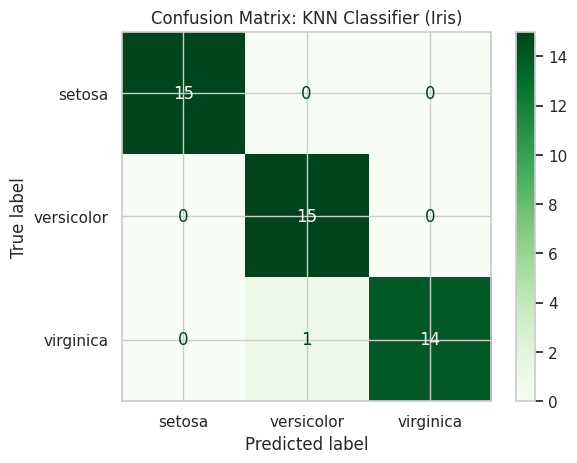

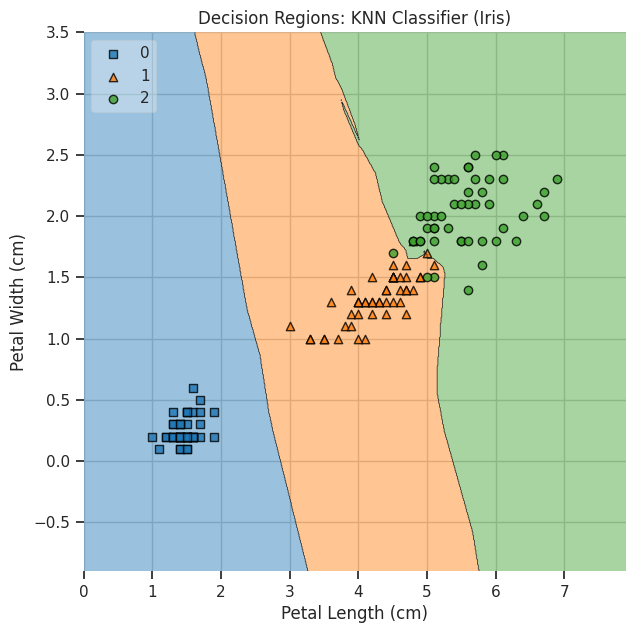

In [4]:
# KNN Classifier on Iris (using petal length and width)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_red, y_train_red)

# Predictions and Evaluation
y_knn_pred = knn.predict(X_test_red)
y_knn_prob = knn.predict_proba(X_test_red)

print("KNN Classifier Report:")
print(classification_report(y_test_red, y_knn_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_red, y_knn_pred))
print("Weighted F1 Score:", f1_score(y_test_red, y_knn_pred, average='weighted'))
print("Log Loss:", log_loss(y_test_red, y_knn_prob))

# Plot confusion matrix for KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_red, y_knn_pred), display_labels=target_names)
disp_knn.plot(cmap='Greens')
plt.title("Confusion Matrix: KNN Classifier (Iris)")
plt.show()

# Plot decision regions for KNN
plt.figure(figsize=(7,7))
plot_decision_regions(np.vstack((X_train_red, X_test_red)), np.hstack((y_train_red, y_test_red)), clf=knn, legend=2)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Regions: KNN Classifier (Iris)")
plt.show()


## Binary Classification with the Breast Cancer Dataset

We'll now use the Breast Cancer dataset (a binary classification problem). We'll apply Logistic Regression and Gaussian Naive Bayes.


In [5]:
# Load and Inspect the Breast Cancer Dataset
breast_cancer = datasets.load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target
print("Breast Cancer Dataset Description:")
print(breast_cancer.DESCR[:1000])  # Print first 1000 characters for brevity

# Create a DataFrame for inspection
df_bc = pd.DataFrame(data=np.c_[X_bc, y_bc], columns=list(breast_cancer.feature_names) + ['target'])
display(df_bc.head())


Breast Cancer Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Logistic Regression for Binary Classification

Logistic Regression Report (Breast Cancer):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Balanced Accuracy: 0.9359667056074766
Weighted F1 Score: 0.9468994906243223
Log Loss: 0.11897176961474364


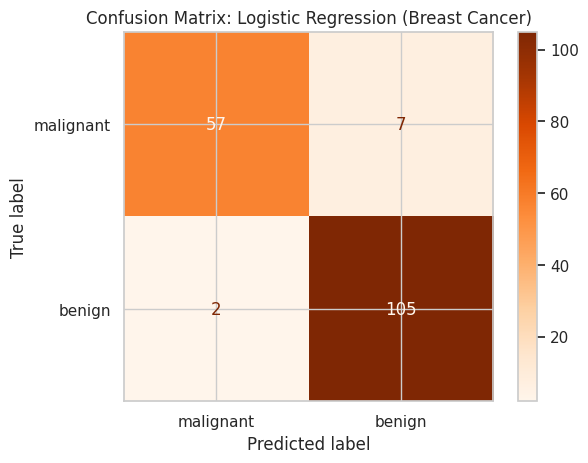

In [6]:
# Logistic Regression on Breast Cancer Dataset
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42, stratify=y_bc)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_bc, y_train_bc)

y_lr_pred = lr.predict(X_test_bc)
y_lr_prob = lr.predict_proba(X_test_bc)

print("Logistic Regression Report (Breast Cancer):")
print(classification_report(y_test_bc, y_lr_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_bc, y_lr_pred))
print("Weighted F1 Score:", f1_score(y_test_bc, y_lr_pred, average='weighted'))
print("Log Loss:", log_loss(y_test_bc, y_lr_prob))

# Confusion matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_bc, y_lr_pred),
                                 display_labels=breast_cancer.target_names)
disp_lr.plot(cmap='Oranges')
plt.title("Confusion Matrix: Logistic Regression (Breast Cancer)")
plt.show()


### Gaussian Naive Bayes for Binary Classification

Gaussian Naive Bayes Report (Breast Cancer):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Balanced Accuracy: 0.9359667056074766
Weighted F1 Score: 0.9468994906243223
Log Loss: 0.33819522327849943


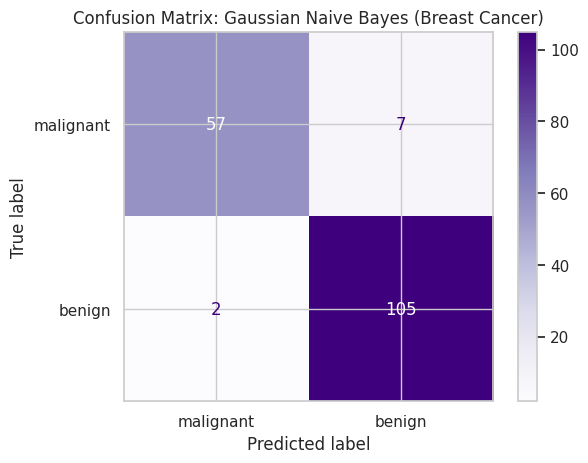

In [7]:
# Gaussian Naive Bayes on Breast Cancer Dataset
gnb = GaussianNB()
gnb.fit(X_train_bc, y_train_bc)

y_gnb_pred = gnb.predict(X_test_bc)
y_gnb_prob = gnb.predict_proba(X_test_bc)

print("Gaussian Naive Bayes Report (Breast Cancer):")
print(classification_report(y_test_bc, y_gnb_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_bc, y_gnb_pred))
print("Weighted F1 Score:", f1_score(y_test_bc, y_gnb_pred, average='weighted'))
print("Log Loss:", log_loss(y_test_bc, y_gnb_prob))

# Confusion matrix for Gaussian Naive Bayes
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_bc, y_gnb_pred),
                                  display_labels=breast_cancer.target_names)
disp_gnb.plot(cmap='Purples')
plt.title("Confusion Matrix: Gaussian Naive Bayes (Breast Cancer)")
plt.show()


## Hyperparameter Optimization for KNN (Multi-Class Example)

We'll use GridSearchCV to tune the hyperparameters for KNN on the Iris dataset.


Best Hyperparameters for KNN: {'n_neighbors': 5, 'p': 1}
Optimized KNN Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Balanced Accuracy: 0.9777777777777779
Weighted F1 Score: 0.9777530589543938
Log Loss: 0.8222392470113683


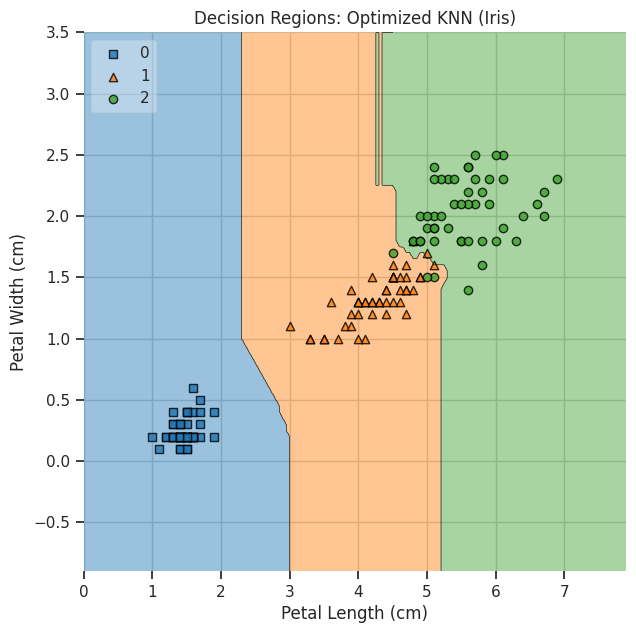

In [8]:
# Hyperparameter Optimization for KNN
hyper_params = {
    'n_neighbors': range(1, 16),  # Trying neighbors from 1 to 15
    'p': range(1, 5)             # Trying different distance metrics (Manhattan, Euclidean, etc.)
}

grid = GridSearchCV(KNeighborsClassifier(), hyper_params, cv=5)
grid.fit(X_train_red, y_train_red)
print("Best Hyperparameters for KNN:", grid.best_params_)

# Train KNN with best parameters
knn_best = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], p=grid.best_params_['p'])
knn_best.fit(X_train_red, y_train_red)

y_knn_best_pred = knn_best.predict(X_test_red)
y_knn_best_prob = knn_best.predict_proba(X_test_red)

print("Optimized KNN Classifier Report:")
print(classification_report(y_test_red, y_knn_best_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_red, y_knn_best_pred))
print("Weighted F1 Score:", f1_score(y_test_red, y_knn_best_pred, average='weighted'))
print("Log Loss:", log_loss(y_test_red, y_knn_best_prob))

# Plot decision regions for optimized KNN
plt.figure(figsize=(7,7))
plot_decision_regions(np.vstack((X_train_red, X_test_red)), np.hstack((y_train_red, y_test_red)), clf=knn_best, legend=2)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Regions: Optimized KNN (Iris)")
plt.show()


## Cross Validation

We'll evaluate our classifiers using cross-validation.


In [9]:
# Cross Validation for Logistic Regression, Gaussian NB, and KNN
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(lr, X_bc, y_bc, cv=5)
cv_scores_gnb = cross_val_score(gnb, X_bc, y_bc, cv=5)
cv_scores_knn = cross_val_score(knn, X_iris_reduced, y_iris, cv=5)

print("Logistic Regression CV Scores:", cv_scores_lr)
print("Gaussian Naive Bayes CV Scores:", cv_scores_gnb)
print("KNN Classifier CV Scores (using Iris reduced features):", cv_scores_knn)


Logistic Regression CV Scores: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Gaussian Naive Bayes CV Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
KNN Classifier CV Scores (using Iris reduced features): [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


KFold Cross-Validation Results for Logistic Regression:
{'fit_time': array([2.37540483, 3.66212749, 2.86796737, 2.7293303 , 1.45061469]), 'score_time': array([0.02854586, 0.04305005, 0.01804566, 0.0172224 , 0.01661062]), 'test_accuracy': array([0.95614035, 0.96491228, 0.93859649, 0.97368421, 0.92035398]), 'test_precision': array([0.95690493, 0.96602789, 0.9390588 , 0.97371902, 0.92021806]), 'test_recall': array([0.95614035, 0.96491228, 0.93859649, 0.97368421, 0.92035398]), 'test_f1_score': array([0.95580143, 0.96514312, 0.938122  , 0.97362143, 0.92021135])}

StratifiedKFold Cross-Validation Results for Logistic Regression:
{'fit_time': array([2.03592467, 1.59537983, 0.51771235, 0.56595278, 0.63611698]), 'score_time': array([0.01861644, 0.00932479, 0.00952148, 0.009238  , 0.00944114]), 'test_accuracy': array([0.96491228, 0.92105263, 0.96491228, 0.94736842, 0.97345133]), 'test_precision': array([0.96789847, 0.92278393, 0.966759  , 0.94846206, 0.97452762]), 'test_recall': array([0.9649122

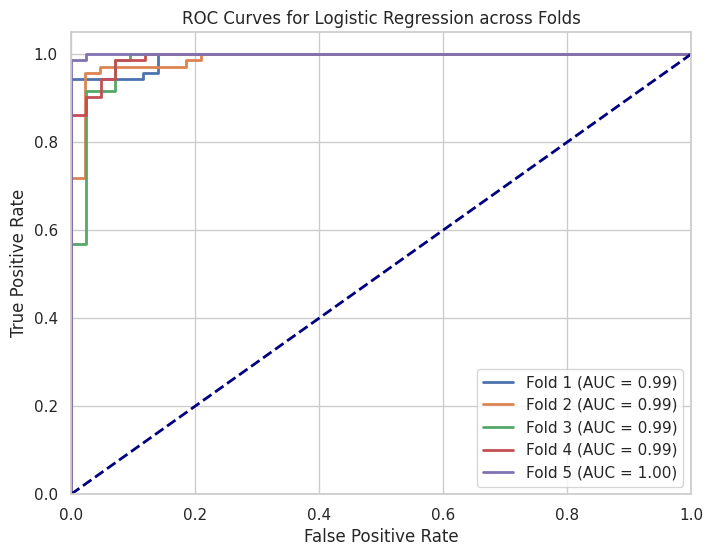

In [19]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

# ROC Curve and Cross-Validation for Logistic Regression (Breast Cancer)
from sklearn.metrics import roc_curve, auc


def evaluate_model(model, X, y):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),  # or 'macro', 'micro'
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='weighted'),
        # Add AUC, AUROC and loss if applicable
    }

    # Define different cross-validation strategies
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_results_kf = cross_validate(model, X, y, cv=kf, scoring=scoring)
    cv_results_skf = cross_validate(model, X, y, cv=skf, scoring=scoring)

    return cv_results_kf, cv_results_skf

# Example usage for Logistic Regression on Breast Cancer dataset:
cv_results_kf_lr, cv_results_skf_lr = evaluate_model(lr, X_bc, y_bc)
print("KFold Cross-Validation Results for Logistic Regression:")
print(cv_results_kf_lr)
print("\nStratifiedKFold Cross-Validation Results for Logistic Regression:")
print(cv_results_skf_lr)


# Similar calls for other models and datasets:
cv_results_kf_gnb, cv_results_skf_gnb = evaluate_model(gnb, X_bc, y_bc)
print("KFold Cross-Validation Results for Gaussian Naive Bayes:")
print(cv_results_kf_gnb)
print("\nStratifiedKFold Cross-Validation Results for Gaussian Naive Bayes:")
print(cv_results_skf_gnb)

# For KNN you might need to adjust the evaluation based on the reduced dataset:
cv_results_kf_knn, cv_results_skf_knn = evaluate_model(knn, X_iris_reduced, y_iris)
print("KFold Cross-Validation Results for KNN:")
print(cv_results_kf_knn)
print("\nStratifiedKFold Cross-Validation Results for KNN:")
cv_results_skf_knn

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(cv.split(X_bc, y_bc)):
    X_train_cv, X_test_cv = X_bc[train_index], X_bc[test_index]
    y_train_cv, y_test_cv = y_bc[train_index], y_bc[test_index]

    lr_cv = LogisticRegression(max_iter=10000)
    lr_cv.fit(X_train_cv, y_train_cv)
    plot_roc_curve(lr_cv, X_test_cv, y_test_cv, f"Fold {i+1}")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression across Folds')
plt.legend(loc="lower right")
plt.show()


## Summary

In this lecture, we covered:
- **Multi-class Classification** on the Iris dataset using DummyClassifier and KNN.
- **Binary Classification** on the Breast Cancer dataset using Logistic Regression and Gaussian Naive Bayes.
- **Visualization** using confusion matrices, decision regions, and pairplots.
- **Hyperparameter Optimization** using GridSearchCV for KNN.
- **Cross Validation** to evaluate model stability.

For more details, refer to the latest scikit-learn, Matplotlib, and Seaborn documentation.

Happy coding!